In [2]:
# we first import our models that we are going to work with.
import pandas as pd   # for data manipulation
import numpy as np   # for working with arrays
import matplotlib.pyplot as plt  # for visualization purposes
import seaborn as sns      # supports matplotlib in rendering good and beautiful charts.
sns.set()
import statsmodels as sm   # contains good statistical tools for modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor  # ensemble methods for regression

from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error

from sklearn import preprocessing  # for data preprocessing and scaling

# Adding a constant variable 
import statsmodels.api as sm  

import warnings

warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv(r"C:\Users\vaide\OneDrive\Desktop\car_insurance (1).csv")

In [4]:
data

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,0-9y,high school,upper class,0.629027,1,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,0-9y,none,poverty,0.357757,0,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,0-9y,high school,working class,0.493146,1,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,0-9y,university,working class,0.206013,1,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,10-19y,none,working class,0.388366,1,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,10-19y,university,upper class,0.582787,1,0,0,10238,16000.0,sedan,0,0,1,0
9996,910346,26-39,female,10-19y,none,middle class,0.522231,1,0,1,32765,NaN,sedan,1,0,0,0
9997,468409,26-39,male,0-9y,high school,middle class,0.470940,1,0,1,10238,14000.0,sedan,0,0,0,0
9998,903459,26-39,female,10-19y,high school,poverty,0.364185,0,0,1,10238,13000.0,sedan,2,0,1,1


In [5]:
data.shape # printing the shape of dataset
data.dtypes # printing datatypes of all the dataset variables
data.info()  # print the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   MARRIED              10000 non-null  int64  
 9   CHILDREN             10000 non-null  int64  
 10  POSTAL_CODE          10000 non-null  int64  
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [6]:
print('sum of duplicated values: {}\n'.format(data.duplicated().sum()))
print('sum of null values:\n {}'.format(data.isnull().sum()))
data.columns

sum of duplicated values: 0

sum of null values:
 ID                       0
AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [7]:
data.describe

<bound method NDFrame.describe of           ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0     569520    65+  female               0-9y  high school    upper class   
1     750365  16-25    male               0-9y         none        poverty   
2     199901  16-25  female               0-9y  high school  working class   
3     478866  16-25    male               0-9y   university  working class   
4     731664  26-39    male             10-19y         none  working class   
...      ...    ...     ...                ...          ...            ...   
9995  323164  26-39  female             10-19y   university    upper class   
9996  910346  26-39  female             10-19y         none   middle class   
9997  468409  26-39    male               0-9y  high school   middle class   
9998  903459  26-39  female             10-19y  high school        poverty   
9999  442696  26-39  female               0-9y         none  working class   

      CREDIT_SCORE  VEHICLE_O

In [8]:
data.dtypes

ID                       int64
AGE                     object
GENDER                  object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

In [9]:
(data.isna().sum() / len(data)) * 100

ID                     0.00
AGE                    0.00
GENDER                 0.00
DRIVING_EXPERIENCE     0.00
EDUCATION              0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
MARRIED                0.00
CHILDREN               0.00
POSTAL_CODE            0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64

# Data cleaning

In [10]:
GENDER = {'male':1, 'female':0}
data['GENDER'] = [GENDER[item] for item in data['GENDER']]

In [11]:
EDUCATION = {'high school':1, 'university':2,'none':0}
data['EDUCATION'] = [EDUCATION[item] for item in data['EDUCATION']]

In [12]:
INCOME = {'upper class':3, 'poverty':0,'working class':1, 'middle class':2}
data['INCOME'] = [INCOME[item] for item in data['INCOME']]

In [13]:
VEHICLE_TYPE = {'sports car':1, 'sedan':0}
data['VEHICLE_TYPE'] = [VEHICLE_TYPE[item] for item in data['VEHICLE_TYPE']]

In [14]:
AGE = {'16-25':20, '26-39':34,'40-64':52, '65+':65}
data['AGE'] = [AGE[item] for item in data['AGE']]

In [15]:
DRIVING_EXPERIENCE = {'0-9y':5, '10-19y':15,'20-29y':25, '30y+':30}
data['DRIVING_EXPERIENCE'] = [DRIVING_EXPERIENCE[item] for item in data['DRIVING_EXPERIENCE']]

In [16]:
data['ANNUAL_MILEAGE'].fillna(data['ANNUAL_MILEAGE'].mean(),inplace=True)
data['CREDIT_SCORE'].fillna(data['CREDIT_SCORE'].mean(),inplace=True)

In [17]:
(data.isna().sum() / len(data)) * 100

ID                     0.0
AGE                    0.0
GENDER                 0.0
DRIVING_EXPERIENCE     0.0
EDUCATION              0.0
INCOME                 0.0
CREDIT_SCORE           0.0
VEHICLE_OWNERSHIP      0.0
MARRIED                0.0
CHILDREN               0.0
POSTAL_CODE            0.0
ANNUAL_MILEAGE         0.0
VEHICLE_TYPE           0.0
SPEEDING_VIOLATIONS    0.0
DUIS                   0.0
PAST_ACCIDENTS         0.0
OUTCOME                0.0
dtype: float64

In [18]:
data.dtypes

ID                       int64
AGE                      int64
GENDER                   int64
DRIVING_EXPERIENCE       int64
EDUCATION                int64
INCOME                   int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE             int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

# Heatmap

<AxesSubplot:>

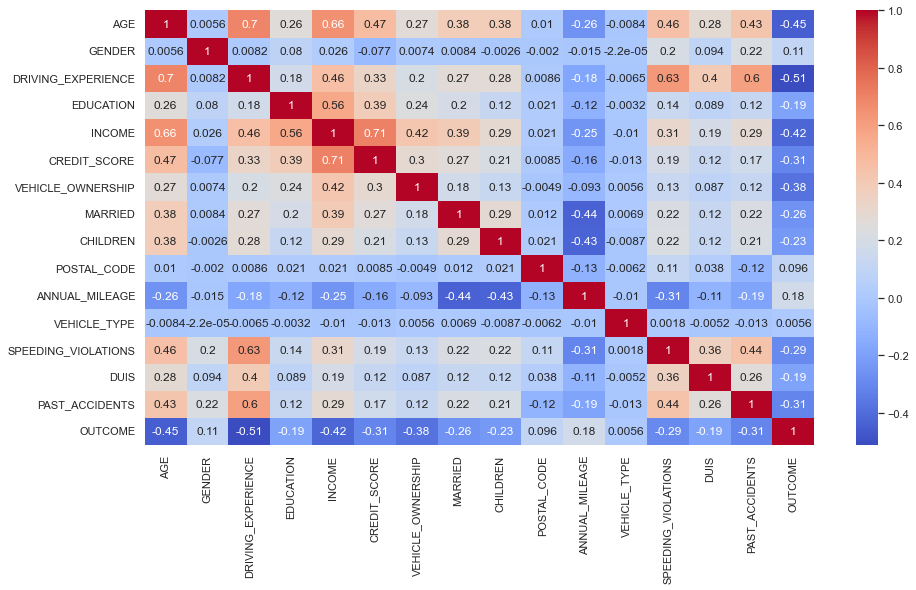

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [20]:
correlation = data.corr()
correlation['OUTCOME'].sort_values(ascending = False)[1:]

# columns ordered from the higest posisve correlation to the lowest

ANNUAL_MILEAGE         0.177575
GENDER                 0.107208
POSTAL_CODE            0.095889
VEHICLE_TYPE           0.005620
ID                    -0.010506
DUIS                  -0.189352
EDUCATION             -0.189357
CHILDREN              -0.232835
MARRIED               -0.262104
SPEEDING_VIOLATIONS   -0.291862
CREDIT_SCORE          -0.309010
PAST_ACCIDENTS        -0.311495
VEHICLE_OWNERSHIP     -0.378921
INCOME                -0.422996
AGE                   -0.448520
DRIVING_EXPERIENCE    -0.513072
Name: OUTCOME, dtype: float64

In [21]:
print("Grade counting description")
print(data['OUTCOME'].value_counts())

Grade counting description
0    6867
1    3133
Name: OUTCOME, dtype: int64


# Multicollinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
calc_vif(data)

,variables,VIF
0,ID,3.838447
1,AGE,22.913133
2,GENDER,2.358999
3,DRIVING_EXPERIENCE,13.712763
4,EDUCATION,5.467200
5,INCOME,13.007065
6,CREDIT_SCORE,26.922407
7,VEHICLE_OWNERSHIP,4.234294
8,MARRIED,2.661270
9,CHILDREN,3.968332


<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

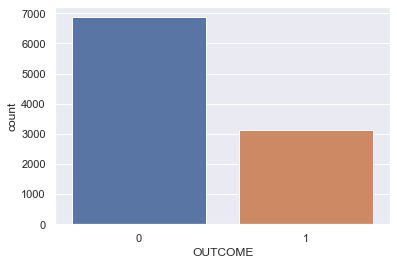

In [24]:
sns.countplot(data['OUTCOME'])

In [25]:
data= data
y = data['OUTCOME']
X = data.drop(['OUTCOME'], axis = 1)

In [26]:
data

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65,0,5,1,3,0.629027,1,0,1,10238,12000.000000,0,0,0,0,0
1,750365,20,1,5,0,0,0.357757,0,0,0,10238,16000.000000,0,0,0,0,1
2,199901,20,0,5,1,1,0.493146,1,0,0,10238,11000.000000,0,0,0,0,0
3,478866,20,1,5,2,1,0.206013,1,0,1,32765,11000.000000,0,0,0,0,0
4,731664,34,1,15,0,1,0.388366,1,0,0,32765,12000.000000,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,34,0,15,2,3,0.582787,1,0,0,10238,16000.000000,0,0,0,1,0
9996,910346,34,0,15,0,2,0.522231,1,0,1,32765,11697.003207,0,1,0,0,0
9997,468409,34,1,5,1,2,0.470940,1,0,1,10238,14000.000000,0,0,0,0,0
9998,903459,34,0,15,1,0,0.364185,0,0,1,10238,13000.000000,0,2,0,1,1


In [27]:
data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65,0,5,1,3,0.629027,1,0,1,10238,12000.0,0,0,0,0,0
1,750365,20,1,5,0,0,0.357757,0,0,0,10238,16000.0,0,0,0,0,1
2,199901,20,0,5,1,1,0.493146,1,0,0,10238,11000.0,0,0,0,0,0
3,478866,20,1,5,2,1,0.206013,1,0,1,32765,11000.0,0,0,0,0,0
4,731664,34,1,15,0,1,0.388366,1,0,0,32765,12000.0,0,2,0,1,1


In [28]:
data=data.drop(['ID'], axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=101)

In [30]:
# Feature before mean normalization
unscaled_features = X_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indeces and column names:
X_train = pd.DataFrame(X_train_array, index= X_train.index, columns= X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index= X_test.index, columns= X_test.columns)

In [31]:
log_model = sm.Logit(y_train, X_train).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.501039
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                OUTCOME   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7484
Method:                           MLE   Df Model:                           15
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:                  0.1887
Time:                        18:18:31   Log-Likelihood:                -3757.8
converged:                       True   LL-Null:                       -4632.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ID                     -0.0152      0.029     -0.533      0.594      -0.071       0.041
AG

In [32]:
p_val = pd.DataFrame(log_model.pvalues, columns=['p_value'])
coef = pd.DataFrame(log_model.params, columns= ['coef'])
p_coef = pd.concat([coef, p_val], axis = 1)
p_coef

,coef,p_value
ID,-0.015207,5.943428e-01
AGE,-0.023820,5.971522e-01
GENDER,0.303727,1.004934e-22
DRIVING_EXPERIENCE,-0.948901,1.107196e-74
EDUCATION,-0.010294,7.702444e-01
INCOME,-0.280168,1.938170e-07
CREDIT_SCORE,-0.042275,2.974110e-01
VEHICLE_OWNERSHIP,-0.609733,6.702991e-83
MARRIED,-0.092282,5.245162e-03
CHILDREN,-0.089223,6.079304e-03


In [33]:
print(p_coef[p_coef['p_value'] < 0.05].sort_values('p_value', ascending=False))

                        coef       p_value
CHILDREN           -0.089223  6.079304e-03
MARRIED            -0.092282  5.245162e-03
ANNUAL_MILEAGE      0.118413  8.809679e-04
INCOME             -0.280168  1.938170e-07
GENDER              0.303727  1.004934e-22
POSTAL_CODE         0.300299  3.601072e-23
DRIVING_EXPERIENCE -0.948901  1.107196e-74
VEHICLE_OWNERSHIP  -0.609733  6.702991e-83


In [34]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report and Confusion Matrix
LogisticRegression()
model=LogisticRegression(solver='liblinear',random_state=0).fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Confusion Matrix\n",confusion_matrix(y_test, model.predict(X_test)))

Confusion Matrix
 [[1491  187]
 [ 294  528]]


In [35]:
predictions = model.predict(X_test)

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[1491,  187],
       [ 294,  528]], dtype=int64)

<AxesSubplot:>

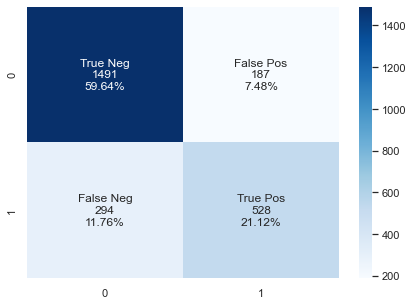

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [38]:
print("Classification Report\n",classification_report(y_test, model.predict(X_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1678
           1       0.74      0.64      0.69       822

    accuracy                           0.81      2500
   macro avg       0.79      0.77      0.77      2500
weighted avg       0.80      0.81      0.80      2500



In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.808
Precision: 0.738
Recall: 0.642


# Gradient boost model

In [40]:
gbclass= GradientBoostingClassifier(random_state=0)
gbclass.fit(X_train, y_train)
gbypred=gbclass.predict(X_test)

Text(0.5, 0, 'Gradient Boosting Feature Importance')

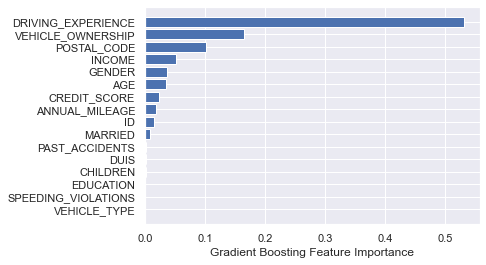

In [41]:
sorted_idx = gbclass.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], gbclass.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

In [42]:
gbclass.score(X_test, y_test)

0.816

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, gbypred))
print('Precision: %.3f' % precision_score(y_test, gbypred))
print('Recall: %.3f' % recall_score(y_test, gbypred))

Accuracy: 0.816
Precision: 0.743
Recall: 0.674


In [44]:
print("Accuracy: ", accuracy_score(y_test, gbypred))
print(metrics.confusion_matrix(y_test,gbypred))

#confusion_matrix=print("Confusion Matrix\n",confusion_matrix(y_test, gbypred))

Accuracy:  0.816
[[1486  192]
 [ 268  554]]


# Decision tree

In [45]:
tModel = DecisionTreeClassifier(max_depth=3)
tModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
yDPred = tModel.predict(X_test)
print(metrics.confusion_matrix(y_test,yDPred))

[[1449  229]
 [ 338  484]]


In [47]:
print('Accuracy: '+str(round(accuracy_score(y_test, yDPred)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_test, yDPred)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_test, yDPred)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(y_test, yDPred)*100,2))+'%')

Accuracy: 77.32%
Precision: 67.88%
Recall: 58.88%
MSE: 22.68%


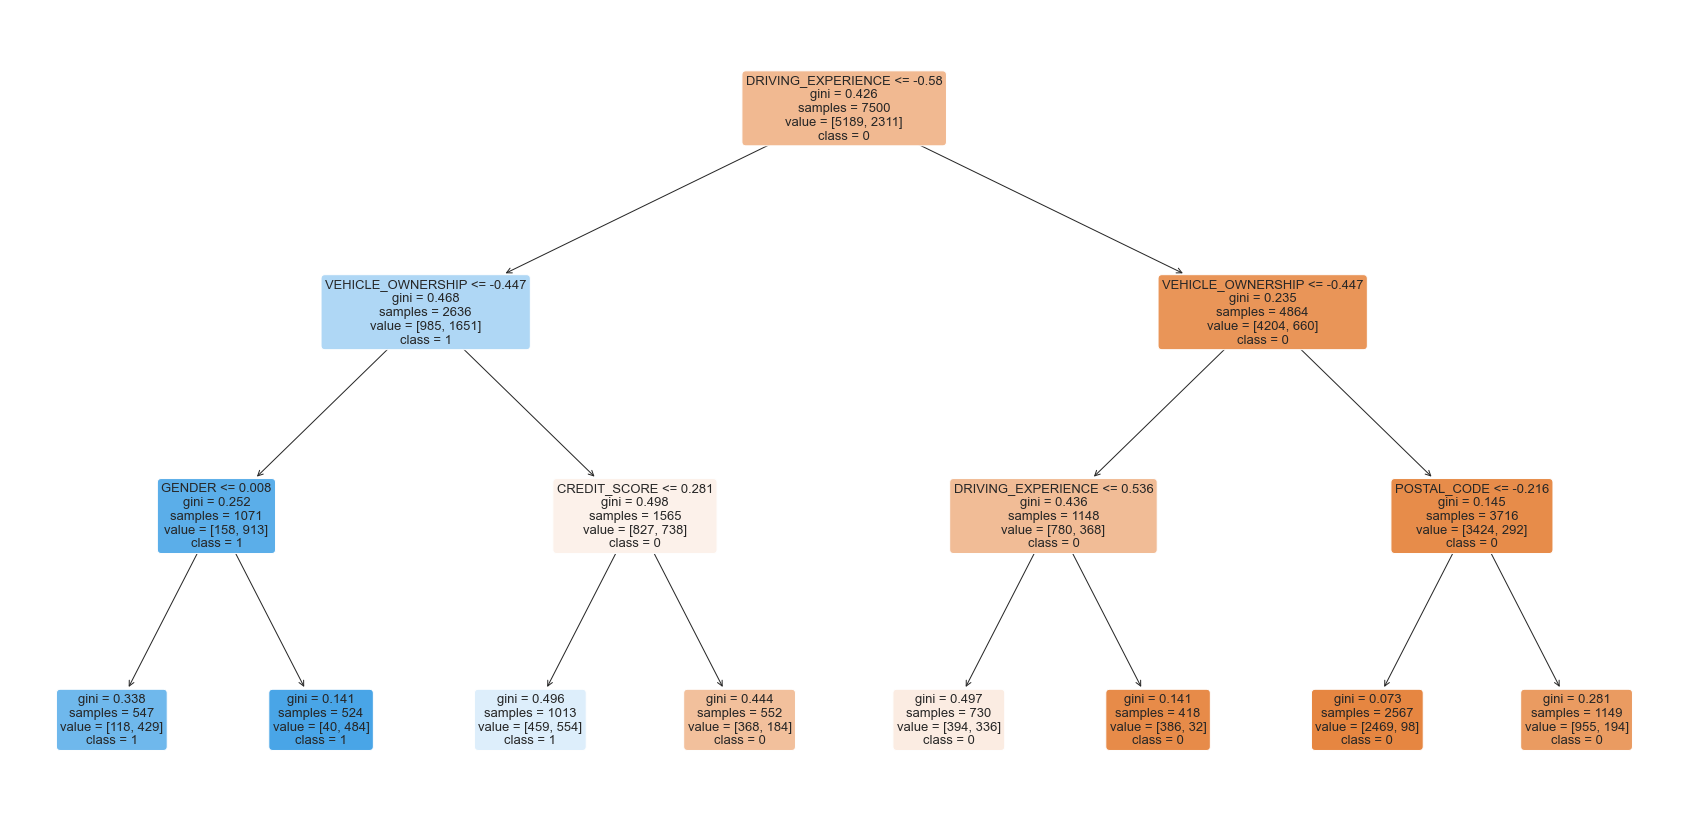

In [48]:
plt.figure(figsize=(30,15))
feature_names = X.columns.values.tolist()
target_names = ['0','1']

tree.plot_tree(tModel, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
plt.savefig('DecisionTree.png') 

In [49]:
print("Classification report - \n", classification_report(y_test,yDPred))

Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1678
           1       0.68      0.59      0.63       822

    accuracy                           0.77      2500
   macro avg       0.74      0.73      0.73      2500
weighted avg       0.77      0.77      0.77      2500



# Random Forest

In [50]:
rModel=RandomForestClassifier()
rModel.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
yDPred = rModel.predict(X_test)
print(metrics.confusion_matrix(y_test,yDPred))

[[1477  201]
 [ 277  545]]


In [53]:
print('Accuracy: '+str(round(accuracy_score(y_test, yDPred)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_test, yDPred)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_test, yDPred)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(y_test, yDPred)*100,2))+'%')

Accuracy: 80.88%
Precision: 73.06%
Recall: 66.3%
MSE: 19.12%


In [54]:
print("Classification report - \n", classification_report(y_test,yDPred))

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1678
           1       0.73      0.66      0.70       822

    accuracy                           0.81      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.81      0.81      0.81      2500



# Neural Network

In [55]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp= MLPClassifier(3, solver='sgd', learning_rate_init=0.01, max_iter= 10000)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.8048

In [56]:
from sklearn.metrics import mean_squared_error
nnpred=mlp.predict(X_test)

print('Accuracy: '+str(round(accuracy_score(y_test, nnpred)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_test, nnpred)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_test, nnpred)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(y_test, nnpred)*100,2))+'%')

Accuracy: 80.48%
Precision: 73.46%
Recall: 63.63%
MSE: 19.52%


In [57]:
yDPred = mlp.predict(X_test)
print(metrics.confusion_matrix(y_test,yDPred))

[[1489  189]
 [ 299  523]]


In [58]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,1.00,0.01,0.70,0.26,0.66,0.47,0.27,0.38,0.38,0.01,-0.26,-0.01,0.46,0.28,0.43,-0.45
GENDER,0.01,1.00,0.01,0.08,0.03,-0.08,0.01,0.01,-0.00,-0.00,-0.02,-0.00,0.20,0.09,0.22,0.11
DRIVING_EXPERIENCE,0.70,0.01,1.00,0.18,0.46,0.33,0.20,0.27,0.28,0.01,-0.18,-0.01,0.63,0.40,0.60,-0.51
EDUCATION,0.26,0.08,0.18,1.00,0.56,0.39,0.24,0.20,0.12,0.02,-0.12,-0.00,0.14,0.09,0.12,-0.19
INCOME,0.66,0.03,0.46,0.56,1.00,0.71,0.42,0.39,0.29,0.02,-0.25,-0.01,0.31,0.19,0.29,-0.42
CREDIT_SCORE,0.47,-0.08,0.33,0.39,0.71,1.00,0.30,0.27,0.21,0.01,-0.16,-0.01,0.19,0.12,0.17,-0.31
VEHICLE_OWNERSHIP,0.27,0.01,0.20,0.24,0.42,0.30,1.00,0.18,0.13,-0.00,-0.09,0.01,0.13,0.09,0.12,-0.38
MARRIED,0.38,0.01,0.27,0.20,0.39,0.27,0.18,1.00,0.29,0.01,-0.44,0.01,0.22,0.12,0.22,-0.26
CHILDREN,0.38,-0.00,0.28,0.12,0.29,0.21,0.13,0.29,1.00,0.02,-0.43,-0.01,0.22,0.12,0.21,-0.23
POSTAL_CODE,0.01,-0.00,0.01,0.02,0.02,0.01,-0.00,0.01,0.02,1.00,-0.13,-0.01,0.11,0.04,-0.12,0.10
